# Shark Attack Incidents

### Read the file and first overview

In [1]:
import pandas as pd

In [2]:
sharks = pd.read_csv(r"./attacks.csv", encoding='latin-1')

In [3]:
sharks.shape

(25723, 24)

In [4]:
pd.set_option("display.max_columns",24) 
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sharks.info() #we have a first overview and check what needs to be cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### We delete rows: Only NaN values / Duplicate rows/ No content in at least 3 

In [6]:
sharks.dropna(how = "all", inplace = True) #we delete the rows with only NaN values 

In [7]:
sharks.shape #we go from (25723, 24) to (8703, 24)

(8703, 24)

In [8]:
sharks.drop_duplicates(inplace = True) #we delete the duplicate rows 

In [9]:
sharks.shape

(6311, 24)

In [10]:
##we keep only the rows that have information in at least 3 columns
sharks.dropna(thresh =3, inplace = True) 

In [11]:
sharks.shape

(6302, 24)

### We drop columns 22 & 23 (only 1 or 2 non NaN)

In [12]:
sharks.drop(['Unnamed: 22','Unnamed: 23'], axis=1, inplace=True) #axis = 1 because we are deleting columns 

In [ ]:
pd.set_option("display.max_rows",None)

### Year (we delete the rows with years older than 1700)

In [13]:
sharks["Year"].fillna(float(0.0), inplace = True) #3 rows only NaN

In [14]:
sharks['Year'] = sharks['Year'].astype(int)

In [15]:
sharks.sort_values("Year",ascending=False,inplace = True) # we sort it "descending"

In [16]:
sharks.reset_index(drop=True,inplace = True) #we reset the index 

In [17]:
sharks.drop(sharks.index[6159:6302],inplace = True) #we delete all the rows with year 1700 or older

### Extracting Date : Case Number 

In [18]:
import re

#### There is only one NaN (I replace it with the right date)

In [19]:
sharks["Case Number"].fillna("1905.09.06", inplace = True)

#### General "cleaning"

In [ ]:
# str.replace("\W*[a-zA-Z]", "") --> Letters by Empty Set
# str.replace("\W00",".01") --> .00 by .01
# str.replace("[.|,]","-") --> "." and ","" by "-""
# str.replace("(-)$","") --> "-" at the end of the string by empty set

In [20]:
sharks["Case Number"] = sharks["Case Number"].str.replace("\W*[a-zA-Z]", "").str.replace("\W00",".01").str.replace("[.|,]","-").str.replace("(-)$","")

#### Cleaning specific cases

In [ ]:
#str.replace("-014","-14")
#str.replace("-013","-13")
#str.replace("-012","-12")
#str.replace("2002-06-132","2002-06-13")
#str.replace("2002-06-131","2002-06-13")
#str.replace("1884-04-38","1884-04-28")
#str.replace("1853-94-29","1853-04-29")

In [21]:
sharks["Case Number"] = sharks["Case Number"].str.replace("-014","-14").str.replace("-013","-13").str.replace("-012","-12").str.replace("2002-06-132","2002-06-13").str.replace("2002-06-131","2002-06-13").str.replace("1884-04-38","1884-04-28").str.replace("1853-94-29","1853-04-29")

#### Change format to_datetime

In [22]:
sharks["Case Number"] = pd.to_datetime(sharks["Case Number"])

In [23]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159 entries, 0 to 6158
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6159 non-null   datetime64[ns]
 1   Date                    6159 non-null   object        
 2   Year                    6159 non-null   int32         
 3   Type                    6155 non-null   object        
 4   Country                 6116 non-null   object        
 5   Area                    5737 non-null   object        
 6   Location                5663 non-null   object        
 7   Activity                5639 non-null   object        
 8   Name                    5954 non-null   object        
 9   Sex                     5604 non-null   object        
 10  Age                     3457 non-null   object        
 11  Injury                  6137 non-null   object        
 12  Fatal (Y/N)             5623 non-null   object  

#### 3 New columns: Year1, Month, Day

In [24]:
import datetime as dt

In [25]:
sharks["Year1"] = sharks["Case Number"].dt.year.astype(int)

In [26]:
sharks["Month"] = sharks["Case Number"].dt.month.astype(int)

In [27]:
sharks["Day"] = sharks["Case Number"].dt.day.astype(int)

### Rearrange and rename columns

In [29]:
sharks = sharks.reindex(columns = ["Case Number","Year1","Month","Day","Type","Country","Area","Location","Activity","Name","Sex ","Age","Injury","Fatal (Y/N)","Species ","Investigator or Source"])

In [31]:
sharks.rename(columns = {'Case Number':'Date','Year1':'Year','Fatal (Y/N)':'Fatal','Investigator or Source':'Source','Sex ':'Sex','Species ':'Species'},inplace = True) 

In [33]:
sharks.head()

,Date,Year,Month,Day,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Species,Source
0,2018-06-25,2018,6,25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF"
1,2018-02-23,2018,2,23,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"Juvenile white shark, 2.7 to 3.2 m","B. Myatt, GSAF"
2,2018-04-15,2018,4,15,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,Alejandro Travaglini,M,37,Lacerations to legs,N,NaN,"B.Myatt, GSAF"
3,2018-04-14,2018,4,14,Unprovoked,BAHAMAS,New Providence,Nirvana Beach,Surfing,Bruce Rowan,M,NaN,No Injury. Shark swam away with the surf board,N,Tiger shark,"Tribune242,"
4,2018-04-10,2018,4,10,Invalid,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,M,56,Injury to ankle from marine animal trapped in ...,N,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com"


### Sex

In [34]:
sharks["Sex"].value_counts()

M      4974
F       624
N         2
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [35]:
sharks["Sex"].fillna("Unknown",inplace=True) # we fill NaN with "Unknown"

In [36]:
sharks["Sex"] = sharks["Sex"].apply(lambda x: x.strip()) #we delete the empty space at the beginning and at end

In [37]:
sharks["Sex"] = sharks["Sex"].str.replace("N|lli|\.","Unknown").str.replace("M","Male").str.replace("F","Female")

In [38]:
sharks["Sex"].value_counts()

Male       4976
Female      624
Unknown     559
Name: Sex, dtype: int64

### Species

In [39]:
sharks['Species'].fillna("Unknown",inplace = True) # we fill NaN with "Unknown"

In [40]:
sharks['Species'] = sharks['Species'].apply(lambda x: x.strip()) #we delete the empty space at the beginning and at end

In [41]:
sharks['Species'] = sharks['Species'].apply(lambda x: x.title()) #first letter mayus and the res minus

In [42]:
sharks['Species'] = sharks['Species'].str.replace('"','').str.replace(".*(White).*","White Shark").str.replace(".*(Involvement).*","No Shark Involved")

In [43]:
sharks['Species'] = sharks['Species'].str.replace(".*(Bull).*","Bull Shark").str.replace(".*(Tiger).*","Tiger Shark").str.replace(".*(Ragged).*","Ragged Tooth Shark").str.replace(".*(Hammer).*","Hammer Head Shark")

In [44]:
sharks['Species'] = sharks['Species'].str.replace(".*(Black).*","Blacktip").str.replace(".*(Mako).*","Mako Shark").str.replace(".*(Lemon).*","Lemon Shark").str.replace(".*(Nurse).*","Nurse Shark").str.replace(".*(Small).*","Small Shark").str.replace(".*(Questionable).*","Questionable Incident").str.replace(".*(Wobbegong).*","Wobbegong Shark").str.replace(".*(Bronze).*","Bronze Whaler Shark").str.replace(".*(Blue).*","Blue")

In [45]:
sharks['Species'].value_counts().nlargest(20)

Unknown                  2735
White Shark               662
No Shark Involved         330
Tiger Shark               251
Bull Shark                179
Blacktip                  106
Invalid                   101
Nurse Shark                93
Questionable Incident      75
Small Shark                66
Bronze Whaler Shark        64
Mako Shark                 55
Blue                       51
Wobbegong Shark            50
Hammer Head Shark          46
Ragged Tooth Shark         43
4' Shark                   40
6' Shark                   39
Lemon Shark                35
1.8 M [6'] Shark           35
Name: Species, dtype: int64

In [46]:
species = sharks["Species"].value_counts().nlargest(16).index.to_list() #we create a list with the 16 more common species

In [47]:
sharks["Species"] = sharks["Species"].apply(lambda x: "Others" if (x not in species) else x) 

In [48]:
sharks = sharks.drop(sharks[sharks.Species.isin(['No Shark Involved'])].index) #we delete the rows where no shark was involved

In [49]:
sharks.shape

(5829, 16)

### Age

In [50]:
sharks["Age"].value_counts()

18                147
17                146
19                139
15                136
20                135
                 ... 
25 or 28            1
21, 34,24 & 35      1
30 & 32             1
72                  1
9 & 12              1
Name: Age, Length: 148, dtype: int64

In [51]:
#we guess nobody might have been older than 109

Edad = [str(i) for i in list(range(1, 110))] 

In [52]:
#we replace NaN by 0
#(we do it because otherwise the strip function doesn't work)

sharks["Age"].fillna("0",inplace=True) 

In [53]:
#we delete the empty space at the beginning and at end

sharks["Age"] = sharks["Age"].apply(lambda x: x.strip())

In [54]:
#we substitute the cells that don't have an int between 1 and 109 by an empty sell

sharks["Age"] = sharks["Age"].apply(lambda x: np.NaN if x not in Edad else int(x)) 

In [56]:
# I don't understand why the type is float

sharks["Age"].value_counts()

18.0    147
17.0    146
19.0    139
20.0    136
15.0    136
       ... 
87.0      1
84.0      1
75.0      1
86.0      1
81.0      1
Name: Age, Length: 79, dtype: int64

In [57]:
#we fill the NaN values with the average of the rest

sharks["Age"].fillna(sharks["Age"].mean(),inplace=True) 

In [58]:
#we change the type to int (as it didn't work before)

sharks["Age"] = sharks["Age"].astype(int) 

### Fatal

In [59]:
sharks['Fatal'].fillna("UNKNOWN",inplace = True)

In [60]:
##we delete the empty space at the beginning and at end
sharks["Fatal"] = sharks["Fatal"].apply(lambda x: x.strip()) 

In [61]:
sharks["Fatal"].value_counts()

N          4222
Y          1316
UNKNOWN     288
M             1
y             1
2017          1
Name: Fatal, dtype: int64

In [62]:
sharks['Fatal'] = sharks['Fatal'].str.replace("2017","UNKNOWN").str.replace("^[Yy]","Yes").str.replace("^[NnM]","No")

In [63]:
sharks["Fatal"] = sharks["Fatal"].apply(lambda x: x.title() if (x == "UNKNOWN") else x) #we apply title function to "UNKNOWN"

In [64]:
sharks["Fatal"].value_counts()

No         4223
Yes        1317
Unknown     289
Name: Fatal, dtype: int64

### Activity

In [65]:
sharks['Activity'].fillna("Others",inplace = True)

In [66]:
sharks['Activity'] = sharks['Activity'].apply(lambda x: x.title())

In [67]:
sharks["Activity"].value_counts()

Surfing                                                             945
Swimming                                                            792
Others                                                              437
Fishing                                                             410
Spearfishing                                                        323
                                                                   ... 
Fishing, Had Just Speared A Ulua                                      1
Free Diving For Abalone (Submerged)                                   1
Fishing With Hand Line Tied To Wrist & Was Pulled Into The Water      1
Commercial Salvage Diving                                             1
Murdered By Thai Pirates                                              1
Name: Activity, Length: 1393, dtype: int64

In [68]:
#We delete the empty space at the beginning and at end
sharks['Activity'] = sharks['Activity'].str.replace("\s*\s$","") 

In [69]:
#we check the 40 most common activities and sort them by name to check if there are any "duplicates"
sharks["Activity"].value_counts(normalize=True).nlargest(40).sort_index()

Bathing                 0.026420
Body Boarding           0.011151
Body Surfing            0.008063
Boogie Boarding         0.007205
Canoeing                0.002230
Diving                  0.019386
Diving For Abalone      0.001372
Diving For Trochus      0.001372
Fell Into The Water     0.001372
Fell Overboard          0.005147
Fishing                 0.072568
Fishing For Sharks      0.001887
Floating                0.002402
Free Diving             0.004804
Freediving              0.001716
Freedom Swimming        0.001544
Kayak Fishing           0.002402
Kayaking                0.005833
Kite Surfing            0.001887
Others                  0.074970
Paddle Boarding         0.001544
Pearl Diving            0.004632
Playing                 0.001372
Rowing                  0.002402
Scuba Diving            0.013381
Sea Disaster            0.002230
Shark Fishing           0.002745
Sitting On Surfboard    0.001544
Snorkeling              0.014925
Spearfishing            0.055927
Standing  

In [70]:
#Here we could have used open refine
sharks['Activity'] = sharks['Activity'].str.replace("Surf-Skiing","Surf Skiing").str.replace("Freediving","Free Diving") 

In [71]:
sharks["Activity"].value_counts(normalize=True).nlargest(40).sort_index()

Bathing                 0.026420
Boating                 0.001201
Body Boarding           0.011151
Body Surfing            0.008063
Boogie Boarding         0.007205
Canoeing                0.002230
Diving                  0.019386
Diving For Abalone      0.001372
Diving For Trochus      0.001372
Fell Into The Water     0.001372
Fell Overboard          0.005147
Fishing                 0.072568
Fishing For Sharks      0.001887
Floating                0.002402
Free Diving             0.006519
Freedom Swimming        0.001544
Kayak Fishing           0.002402
Kayaking                0.005833
Kite Surfing            0.001887
Others                  0.074970
Paddle Boarding         0.001544
Pearl Diving            0.004632
Playing                 0.001372
Rowing                  0.002402
Scuba Diving            0.013381
Sea Disaster            0.002230
Shark Fishing           0.002745
Sitting On Surfboard    0.001544
Snorkeling              0.014925
Spearfishing            0.055927
Standing  

In [72]:
# we create a list with the 40 most common
activities = sharks["Activity"].value_counts().nlargest(40).index.to_list() 

In [73]:
# if the information of a cell is not in activities we replace it by "Others"
sharks["Activity"] = sharks["Activity"].apply(lambda x: "Others" if x not in activities else x)

In [74]:
sharks["Activity"].value_counts(normalize=True)

Others                  0.353062
Surfing                 0.162978
Swimming                0.143249
Fishing                 0.072568
Spearfishing            0.055927
Bathing                 0.026420
Wading                  0.023846
Diving                  0.019386
Standing                0.016812
Snorkeling              0.014925
Scuba Diving            0.013381
Body Boarding           0.011151
Body Surfing            0.008063
Boogie Boarding         0.007205
Free Diving             0.006519
Kayaking                0.005833
Treading Water          0.005318
Fell Overboard          0.005147
Surf Skiing             0.005147
Pearl Diving            0.004632
Windsurfing             0.003260
Walking                 0.002745
Shark Fishing           0.002745
Rowing                  0.002402
Kayak Fishing           0.002402
Floating                0.002402
Sea Disaster            0.002230
Canoeing                0.002230
Fishing For Sharks      0.001887
Kite Surfing            0.001887
Surf Fishi

### Country

In [75]:
sharks['Country'].fillna("Unknown",inplace = True)

In [76]:
sharks["Country"].value_counts()

USA                 2081
AUSTRALIA           1246
SOUTH AFRICA         535
PAPUA NEW GUINEA     129
NEW ZEALAND          121
                    ... 
MALDIVE ISLANDS        1
ANDAMAN ISLANDS        1
ANTIGUA                1
CAPE VERDE             1
OCEAN                  1
Name: Country, Length: 203, dtype: int64

In [77]:
sharks['Country'] = sharks['Country'].apply(lambda x: x.strip())

In [78]:
sharks['Country'] = sharks['Country'].apply(lambda x: x.title()) 

In [81]:
#we replace the "elements with 2 spaces or more by one space"
sharks['Country'] = sharks['Country'].str.replace("\s{2,}"," ") 

In [80]:
sharks["Country"].value_counts().nlargest(40).sort_index()

Atlantic Ocean            17
Australia               1246
Bahamas                  104
Bermuda                   12
Brazil                   104
Costa Rica                15
Croatia                   30
Cuba                      45
Egypt                     39
England                   22
Fiji                      61
French Polynesia          23
Greece                    17
Hong Kong                 24
India                     34
Indonesia                 21
Iran                      25
Italy                     64
Jamaica                   24
Japan                     32
Marshall Islands          12
Mexico                    85
Mozambique                42
New Caledonia             52
New Zealand              121
Pacific Ocean             18
Panama                    29
Papua New Guinea         129
Philippines               59
Reunion                   58
Solomon Islands           28
South Africa             535
South Atlantic Ocean      12
Spain                     36
Tonga         

In [82]:
# 40 most common countries
countries = sharks["Country"].value_counts().nlargest(40).index.to_list() 

In [83]:
sharks["Country"] = sharks["Country"].apply(lambda x: "Others" if x not in countries else x) 

<AxesSubplot:>

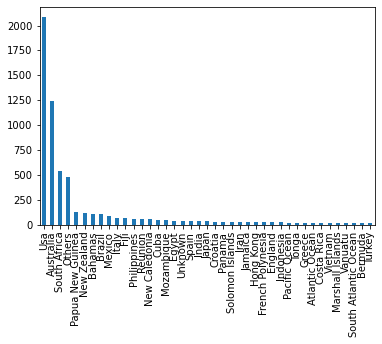

In [85]:
#Here we can easily tell the countries with more accidents: USA and Australia
sharks["Country"].value_counts().plot(kind = "bar")

### Type

<AxesSubplot:>

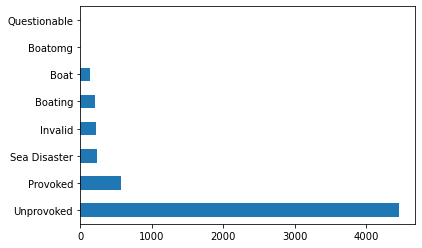

In [86]:
sharks["Type"].value_counts().plot(kind = "barh")

In [87]:
sharks["Type"] = sharks["Type"].str.replace("Boatomg","Boating")

### Delete Columns not Cleaned

In [88]:
sharks.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 0 to 6158
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5829 non-null   datetime64[ns]
 1   Year      5829 non-null   int32         
 2   Month     5829 non-null   int32         
 3   Day       5829 non-null   int32         
 4   Type      5825 non-null   object        
 5   Country   5829 non-null   object        
 6   Area      5436 non-null   object        
 7   Location  5362 non-null   object        
 8   Activity  5829 non-null   object        
 9   Name      5662 non-null   object        
 10  Sex       5829 non-null   object        
 11  Age       5829 non-null   int32         
 12  Injury    5809 non-null   object        
 13  Fatal     5829 non-null   object        
 14  Species   5829 non-null   object        
 15  Source    5815 non-null   object        
dtypes: datetime64[ns](1), int32(4), object(11)
memory usage: 683

In [89]:
sharks.drop(['Source','Injury','Area','Location','Name'], axis=1, inplace=True) 

In [90]:
sharks.head()

,Date,Year,Month,Day,Type,Country,Activity,Sex,Age,Fatal,Species
0,2018-06-25,2018,6,25,Boating,Usa,Others,Female,57,No,White Shark
1,2018-02-23,2018,2,23,Unprovoked,Australia,Swimming,Female,55,No,White Shark
2,2018-04-15,2018,4,15,Unprovoked,Australia,Surfing,Male,37,No,Unknown
3,2018-04-14,2018,4,14,Unprovoked,Bahamas,Surfing,Male,27,No,Tiger Shark
5,2018-04-09,2018,4,9,Unprovoked,New Caledonia,Windsurfing,Unknown,27,No,Others


### We save the document to a new one called "sharks_clean"

In [91]:
sharks.to_csv("sharks_clean.csv", index = False)

### Data Visualisation

#### Pivot Table

In [92]:
sharks_clean = pd.read_csv(r"./sharks_clean.csv")

In [93]:
speciesfatal = sharks_clean.pivot_table(index = "Species",values = "Activity",columns="Fatal",aggfunc="count",fill_value = 0)

In [94]:
speciesfatal.sort_values("Yes", ascending = False)

Fatal,No,Unknown,Yes
Species,,,
Unknown,1753,71,911
White Shark,499,13,150
Others,1094,24,134
Tiger Shark,182,4,65
Bull Shark,141,0,38
Blue,42,1,8
Bronze Whaler Shark,59,1,4
Mako Shark,53,0,2
Questionable Incident,2,71,2
